In [3]:
import osmnx as ox
import networkx as nx
import geopandas as gp
import matplotlib.pyplot as plt

Change the 'location' variable to a chosen lat/long pair that will be the center point of your map

In [4]:
location = (45.523064, -122.676483)

Change the 'dist' variable to modify how much area is included in the graph.

Note: Higher 'dist' means more mapping nodes, which drastically increases the amount of time needed to process the graph.

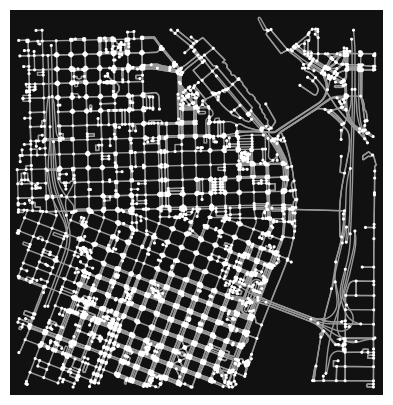

(<Figure size 1500x500 with 1 Axes>, <Axes: >)

In [8]:
base_map = ox.graph_from_point(location, dist= 1000, simplify=True)
ox.plot_graph(base_map, figsize= (15,5), node_size=5)

If you'd like to specify a bounding box for more customization you can do so using this tool: (https://boundingbox.klokantech.com/)

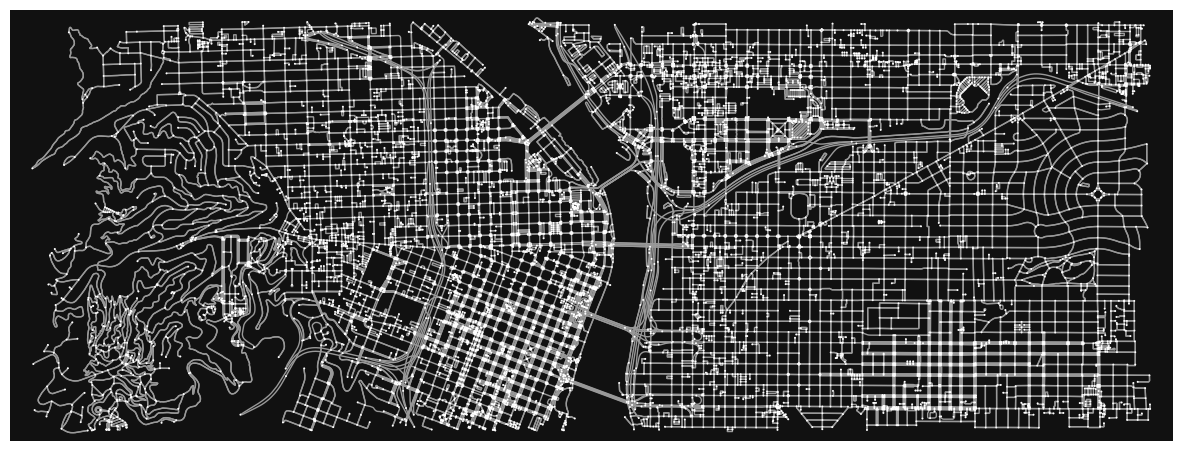

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [12]:
bbox_map = ox.graph_from_bbox(north= 45.5380073544, south= 45.5105864524, east= -122.6179949753, west= -122.7251116745)
ox.plot_graph(bbox_map, figsize= (15,15), node_size=2)

The code block below will calculate the area of the graph in meters squared.

In [13]:
base_map_proj = ox.project_graph(base_map)
nodes_proj = ox.graph_to_gdfs(base_map_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

3954290.346835416

The 'n' value in the code below is the number of nodes in the graph. The higher the value of 'n', the longer it will take to calculate edge centrality.

In [14]:
ox.basic_stats(base_map_proj, area=graph_area_m, clean_int_tol=15)

{'n': 3506,
 'm': 9731,
 'k_avg': 5.5510553337136335,
 'edge_length_total': 278715.5110000003,
 'edge_length_avg': 28.642021477751545,
 'streets_per_node_avg': 3.3739304050199657,
 'streets_per_node_counts': {0: 0,
  1: 270,
  2: 18,
  3: 1395,
  4: 1779,
  5: 42,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.07701083856246435,
  2: 0.00513405590416429,
  3: 0.39788933257273246,
  4: 0.5074158585282373,
  5: 0.011979463776383342,
  6: 0.0005704506560182544},
 'intersection_count': 3236,
 'street_length_total': 174537.46399999995,
 'street_segment_count': 5827,
 'street_length_avg': 29.95322876265659,
 'circuity_avg': 1.0499685016696243,
 'self_loop_proportion': 0.0013729191693839025,
 'clean_intersection_count': 500,
 'node_density_km': 886.6319092642808,
 'intersection_density_km': 818.3516424355997,
 'edge_density_km': 70484.3313347119,
 'street_density_km': 44138.757827856716,
 'clean_intersection_density_km': 126.44493857163161}

Closeness centrality measures how central or well-connected a node is within a network. It is calculated by looking at the average distance from a node to all other nodes in the network.

Note: If you used the bounding box feature replace 'base_map' with 'bbox_map'

In [16]:
edge_centrality = nx.closeness_centrality(nx.line_graph(bbox_map))
nx.set_edge_attributes(bbox_map, edge_centrality, "edge_centrality")

You can change the 'cmap' value to alter the color scheme of the output: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' are the Perceptually Uniform Sequential colormaps provided by Matplotlib.

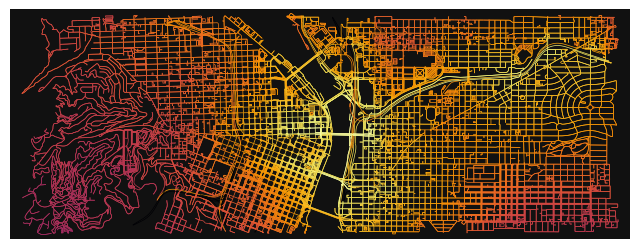

In [23]:
ec = ox.plot.get_edge_colors_by_attr(bbox_map, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(bbox_map, edge_color=ec, edge_linewidth=0.5, node_size=0,save=True, filepath=r"C:\Users\israe\Desktop\Files\Coding\Repos\PostGIS-mapping-python\image.png", dpi= 1200)